In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
n = 100
pi = 0.5
alpha = 0.05
X = np.random.binomial(1,pi,n)
mean = np.mean(X)
z = (mean-pi)/(math.sqrt(pi*(1-pi)/n))
p = 1 - norm.cdf(z)
if p < alpha:
    print('p-value is ' + str(p) + ', so reject H0')
else:
    print('p-value is ' + str(p) + ', so accept H0')


p-value is 0.4207402905608969, so accept H0


In [2]:
p = []
count = 0
for i in range(1000):
        X = np.random.binomial(1,pi,n)
        mean = np.mean(X)
        z = (mean-pi)/(math.sqrt(pi*(1-pi)/n))
        p.append(1 - norm.cdf(z))
        if p[i] < alpha:
                count += 1
print('reject H0 totally ' + str(count) + ' times')

reject H0 totally 48 times


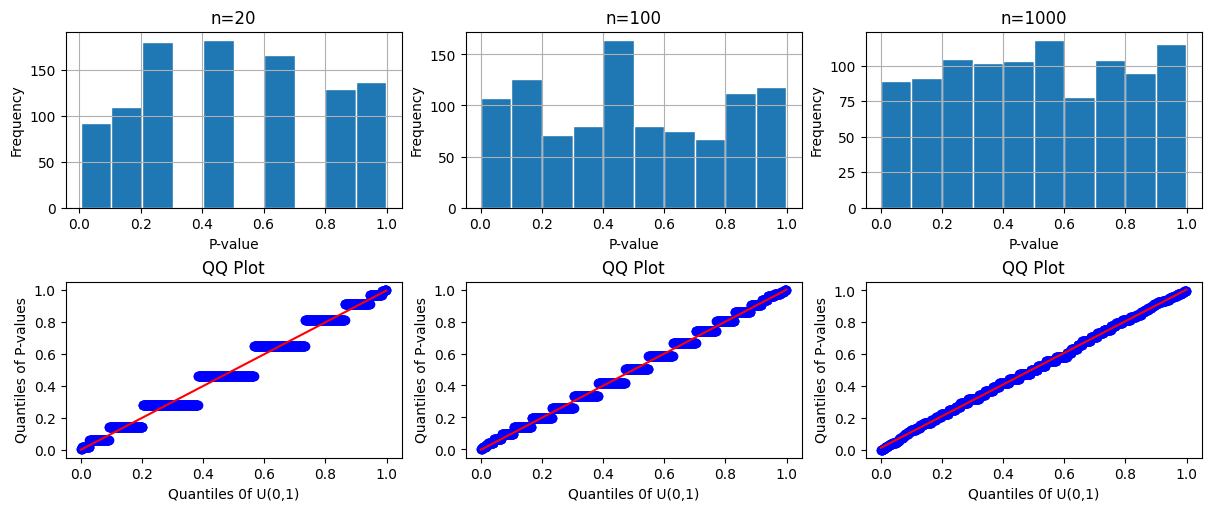

In [98]:

n = [20, 100, 1000]
fig, axes = plt.subplots(2,3,constrained_layout = True, figsize = (12,5)) # create blank subplots
for i in range(3):
    p = []
    for j in range(1000):
        X = np.random.binomial(1,pi,n[i])
        mean = np.mean(X)
        z = (mean-pi)/(math.sqrt(pi*(1-pi)/n[i]))
        p.append(1 - norm.cdf(z))
    axes[0,i].hist(p,bins=10,edgecolor = 'white')
    axes[0,i].grid()
    axes[0,i].set_title('n='+str(n[i]))
    axes[0,i].set_ylabel('Frequency')
    axes[0,i].set_xlabel('P-value')
    stats.probplot(p,dist = 'uniform', plot = axes[1,i])
    axes[1,i].set_title('QQ Plot')
    axes[1,i].set_ylabel('Quantiles of P-values')
    axes[1,i].set_xlabel('Quantiles 0f U(0,1)')

When sample size n become larger, the distribution of p-value will follow U(0,1)

Text(0.5, 0, 'True pi')

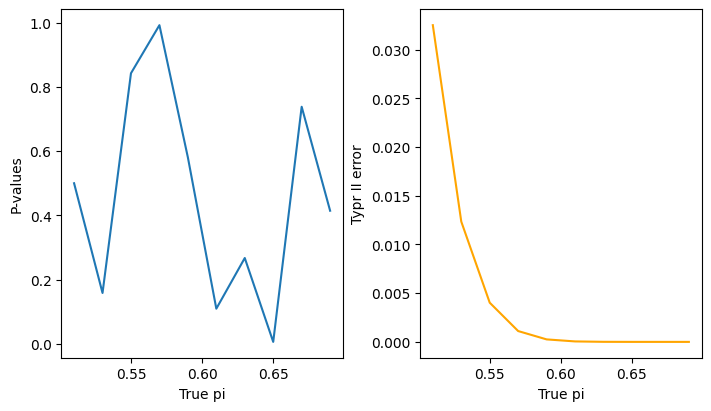

In [201]:
n = 100
alpha = 0.05
p = []
beta = []
fig, axes = plt.subplots(1,2,constrained_layout = True, figsize = (7,4))
x = np.arange(0.51,0.7,0.02)
for pi in x:
    X = np.random.binomial(1,pi,n)
    mean = np.mean(X)
    z = (mean-pi)/(math.sqrt(pi*(1-pi)/n))
    p.append(1 - norm.cdf(z))
    beta.append(norm.cdf((0.5 - 1.645*math.sqrt(pi*(1-pi)/n) - pi)/math.sqrt(pi*(1-pi)/n)))
axes[0].plot(x,p)
axes[0].set_ylabel('P-values')
axes[0].set_xlabel('True pi')
axes[1].plot(x,beta,color = 'orange')
axes[1].set_ylabel('Typr II error')
axes[1].set_xlabel('True pi')

Type II error is monotonically decreasing with π0. 
Reason: H0 is π = 0.5, when π0 increases from 0.51 to 0.7, the probability of accept H0 will decrease.